In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
from pylab import *
import matplotlib.patheffects as PathEffects
from scipy.integrate import quad



hfont = {'fontname':'Times New roman'}
mpl.rcParams['legend.numpoints'] = 1
plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/plots/'

In [17]:
# SiIV

a = 1.46
a_err = 0.31
b = -14.77
b_err = 0.25
fn = lambda x, a, b:pow(10.0, b)*pow(pow(10.0, x)/pow(10.0, 13.64), -1.0*a)

In [18]:
number_expected      = fn(14.6, a, b)*(14.42 + 1.98)*(pow(10., 14.8) - pow(10., 14.4))
number_expected_low  = fn(14.6, a-a_err, b-b_err)*(14.42 + 1.98)*(pow(10., 14.8) - pow(10., 14.4))
number_expected_high = fn(14.6, a+a_err, b+b_err)*(14.42 + 1.98)*(pow(10., 14.8) - pow(10., 14.4))

number_expected_high, number_expected, number_expected_low

(0.3759785057278289, 0.41952999559822685, 0.46812627457501177)

In [19]:
# 3.95145746168e-16 2.957e-15 2.21281617854e-14

number_expected_from_angela      = 2.957E-15*(14.42 + 1.98)*(pow(10., 14.8) - pow(10., 14.4))
number_expected_from_angela_low  = 3.951e-16*(14.42 + 1.98)*(pow(10., 14.8) - pow(10., 14.4))
number_expected_from_angela_high = 2.212e-14*(14.42 + 1.98)*(pow(10., 14.8) - pow(10., 14.4))


number_expected_from_angela_low, number_expected_from_angela, number_expected_from_angela_high

(2.4607644678809706, 18.416807217221034, 137.76793224380427)

In [20]:
1/0.42*16.40

39.047619047619044

In [21]:
# CIV
#1.29 ± 0.08
#-14.02 ± 0.07

def integrand(x):
    a = 1.29
    a_err = 0.08
    b = -14.02
    b_err = 0.07

    return x*pow(10.0, b)*pow(pow(10.0, x)/pow(10.0, 13.64), -1.0*a)


In [22]:
c4 = pd.read_csv('c4_logN_v90.csv')
flags = ['iso', 'low', 'high', 'low_high']

c4[0:1]

,sol,id,z,min_v,v,max_v,min_n,n,max_n,flag
0,S0927,12,4.34608,19.5252,39.8286,60.132,12.8645,12.9767,13.2101,iso


In [23]:
min(c4.n), max(c4.n)

(12.5669, 14.73936252)

In [24]:
x = np.array([ 12.6250, 12.8750, 13.1250, 13.3750, 13.6250, 13.8750, 14.1250, 14.3750, 14.6250])
xbound_low  = np.array(x - 0.125)
xbound_high = np.array(x + 0.125)

N_array = np.zeros(len(x))
N_zeros = np.zeros(len(x))
for i in range(0, len(x)):
    values = np.array(c4.loc[(c4.n > xbound_low[i]) & (c4.n <= xbound_high[i])].n)
    N_array[i] = sum(pow(10, values))
    
    

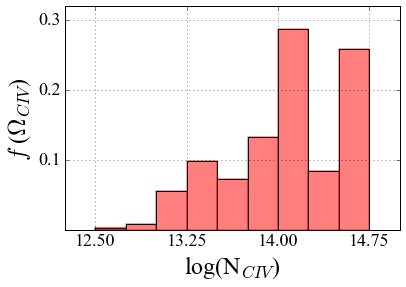

In [27]:
plt.plot([xbound_low, xbound_low], [N_zeros, N_array/sum(N_array)], 'k-')
plt.plot([xbound_high, xbound_high], [N_zeros, N_array/sum(N_array)], 'k-')
plt.plot([xbound_low, xbound_high], [N_array/sum(N_array), N_array/sum(N_array)], 'k-')

for i in range(0, len(x)):
    plt.fill_between([xbound_low[i],xbound_high[i] ], [0, 0], 
                 [N_array[i]/sum(N_array), N_array[i]/sum(N_array)], 
                 color = 'r', lw=1.5, alpha = 0.5)

i=0
plt.fill_between([xbound_low[i],xbound_high[i] ], [0, 0], 
         [N_array[i]/sum(N_array), N_array[i]/sum(N_array)], 
         color = 'r', lw=1.5, alpha = 0.5, label = 'CIV')
plt.xticks([ 12.5, 13.25, 14, 14.75], **hfont, fontsize = 18)

ylabels = ['0.1', '0.2', '0.3']
plt.yticks([0.1, 0.2, 0.3], ylabels, **hfont, fontsize = 18)

plt.grid(True)


ylabel = '$f$ ($\Omega_{CIV}$)'
plt.xlabel('log(N$_{CIV}$)', **hfont,  fontsize=24)
plt.ylabel(ylabel, **hfont,  fontsize=24)

#plt.rc('legend',**{'fontsize':24})
#plt.rc('font',family='Times New Roman')
#plt.legend(loc=2, borderaxespad=1, shadow=True)


plt.ylim([0.0, 0.32] )
plt.xlim([12.25, 15.0])



plot_name = plot_path + 'c4_fraction.png'
plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)

